## 1. ##

A theoretical simple linear regression model is based on a predictor variable, outcome variable, a slope coefficient, Y-intercept coefficient, and a random error term (noise). The predictor variable, often denoted as Xi, is independent, but not necessarily continuous. The outcome variable, often denoted as Y, is dependant and continuous. The dependant variable Y is a random variabel related to X through the model equation Y = β0 + β1x + ε.

In the context of the model equation for a simple linear regression: Y = β0 + β1x + ε

- Y represents the outcome variable
- X represents the predictor variable
- β0 represents the Y-Intercept
- β1 represents the slope
- ε represents error, sometimes called "noise", and introduces a random variable with a distribution into the model.

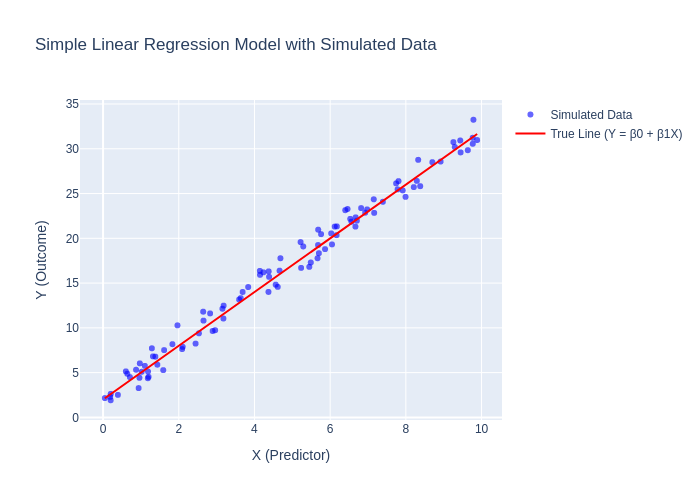

In [5]:
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

# Model parameters
n = 100                   # Number of data points
beta0 = 2                 # Intercept
beta1 = 3                 # Slope
sigma = 1                 # Standard deviation of error term

# Generate predictor variable X
np.random.seed(0)
X = np.random.uniform(0, 10, n)  # Uniformly distributed X between 0 and 10

# Generate error term epsilon ~ N(0, sigma)
epsilon = norm.rvs(loc=0, scale=sigma, size=n)

# Compute the outcome variable Y
Y = beta0 + beta1 * X + epsilon

# Create the plot with Plotly
fig = go.Figure()

# Add scatter plot of the simulated data points
fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', name="Simulated Data",
                         marker=dict(color='blue', opacity=0.6)))

# Add the theoretical regression line
fig.add_trace(go.Scatter(x=X, y=beta0 + beta1 * X, mode='lines', name="True Line (Y = β0 + β1X)",
                         line=dict(color='red')))

# Set plot layout details
fig.update_layout(
    title="Simple Linear Regression Model with Simulated Data",
    xaxis_title="X (Predictor)",
    yaxis_title="Y (Outcome)"
)

# Show the plot as a PNG
fig.show(renderer="png")


In this visualization, the red line represents the theoretical "true" relationship between X and Y without error, while the blue points are simulated data showing how observed values of Y deviate from this line due to the error term. This approach effectively demonstrates the theoretical Simple Linear Regression model's structure.

**ChatGPT Summary** https://chatgpt.com/share/672bf74c-b8b4-8012-a79b-6d62836a8db5

In our interaction, I explained the theoretical Simple Linear Regression (SLR) model, detailing its components: predictor \( X \), intercept \( \beta_0 \), slope \( \beta_1 \), and error term \( \epsilon \). I described how \( Y \) is generated as a noisy linear function of \( X \), with \( \epsilon \) introducing normally distributed randomness. Then, I provided Python code that uses `numpy` and `scipy.stats` to simulate this model, with predictor values sampled from a uniform distribution and error terms from a normal distribution. Finally, I visualized the result using Plotly, ensuring the output is rendered as a PNG for easy inclusion in reports.

## 2. ##

Using the theoretical linear regression model from question #1, we will simulate a dataset

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf  # Used for specifying and fitting statistical models

# Parameters for data generation
n = 100
beta0 = 2
beta1 = 3
sigma = 1

# Generate data
np.random.seed(0)
X = np.random.uniform(0, 10, n)
epsilon = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * X + epsilon

# Combine X and Y into a DataFrame
df = pd.DataFrame({"x": X, "Y": Y})


In [7]:
# What are the following two steps doing?
model_data_specification = smf.ols("Y ~ x", data=df)  # Specifies an OLS regression model with Y as the outcome and x as the predictor
fitted_model = model_data_specification.fit()  # Fits the specified model to our data, estimating the parameters

In [8]:
# Model summaries and parameters
fitted_model.summary()  # Provides a detailed summary of the regression, including coefficients, standard errors, p-values, R-squared, and more.
fitted_model.summary().tables[1]  # Shows a simplified table with only the coefficients, standard errors, t-values, and p-values.
fitted_model.params  # Returns the estimated intercept and slope as a pandas Series.
fitted_model.params.values  # Returns the estimated intercept and slope as a numpy array.
fitted_model.rsquared  # Provides the R-squared value, representing the proportion of variance in Y explained by x.

0.9868523821370108

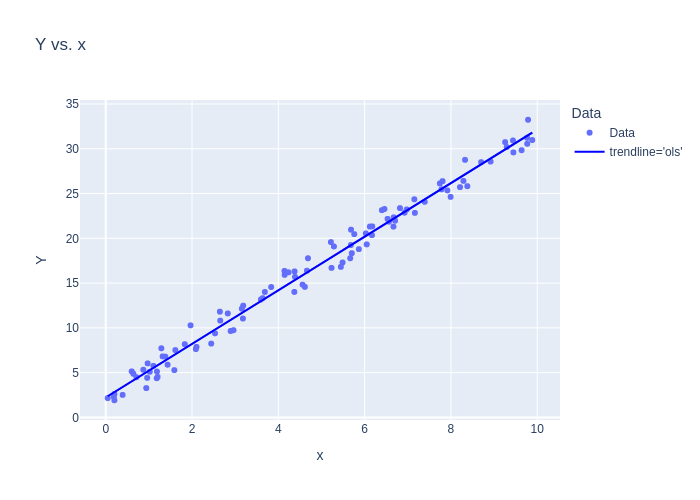

In [9]:
# Adding a 'Data' label for color distinction in the legend
df['Data'] = 'Data'  # Adds a 'Data' label to separate points and trendline in the legend

# Create the scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# What two things does this add onto the figure?
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")
# Adds the fitted regression line as a solid line over the data points to visualize the model fit

# Render as PNG
fig.show(renderer="png")


**ChatGPT Summary** https://chatgpt.com/share/672bf74c-b8b4-8012-a79b-6d62836a8db5

Yes, that’s exactly right! Both visualizations display a linear relationship between \( X \) and \( Y \), but they approach it from two different perspectives:

1. **Theoretical Visualization (First Model)**: This plot uses the *pre-assigned coefficients* (\(\beta_0\) and \(\beta_1\)) to show the “true” line, with simulated data points scattered around it. The goal is to illustrate the relationship we intended to create, defined by the fixed parameters and noise.

2. **Fitted Visualization (Second Model)**: This plot shows the *estimated line* based on the simulated data points, calculated through Ordinary Least Squares (OLS). Here, the slope and intercept are estimated to minimize the squared difference between the observed data points and the fitted line. The fitted line will likely approximate but not exactly match the theoretical line due to random noise in the data.

### Key Takeaway
Both visualizations depict a similar linear relationship:
- The **first** shows the theoretical relationship, given fixed parameters.
- The **second** shows the empirical relationship, based on estimates derived from the data points.

They serve similar purposes in visualizing the relationship but achieve it through different approaches, reflecting the underlying goal of each model: one to simulate data, the other to fit observed data.

## 3. ##

**Explanation**

**The theoretical line** is based on the exact values we set for β0 and β1 in our simulation. This line represents the “true” relationship that we defined between X and Y, with some random variation added through normally distributed errors.

**The fitted line**, on the other hand, is generated by applying Ordinary Least Squares (OLS) to estimate the slope and intercept directly from the simulated data points. Due to random sampling variation in the error terms, the fitted line is an approximation that may differ slightly from the theoretical line. With a larger sample size or less random noise, the fitted line would likely align more closely with the theoretical line.

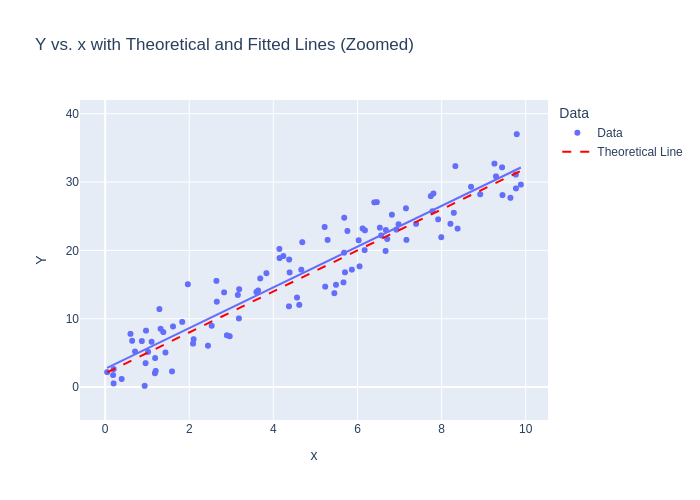

In [14]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Set parameters for the theoretical model
n = 100
beta_0 = 2  # Intercept for the theoretical line
beta_1 = 3  # Slope for the theoretical line
sigma = 3   # Increase standard deviation of the errors for more variability

# Generate predictors (x) and noise (error terms)
np.random.seed(0)  # for reproducibility
x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)  # Increased noise

# Generate outcome (Y) using the theoretical model
Y = beta_0 + beta_1 * x + errors

# Create a DataFrame with x and Y
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a linear regression model to the simulated data
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Generate points for the theoretical line based on pre-assigned coefficients
x_line = np.linspace(df['x'].min(), df['x'].max(), 100)
y_theoretical = beta_0 + beta_1 * x_line

# Visualization with increased noise and zoomed y-axis
df['Data'] = 'Data'  # Add label to legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Theoretical and Fitted Lines (Zoomed)')

# Add theoretical line
fig.add_scatter(x=x_line, y=y_theoretical, mode='lines', line=dict(color='red', dash='dash'), name='Theoretical Line')

# Zoom in on the y-axis to highlight the difference between the lines
fig.update_yaxes(range=[df['Y'].min() - 5, df['Y'].max() + 5])

# Display the plot as a PNG
fig.show(renderer="png")


**Difference between the two lines**

The **Red** theoretical shows the true relationship which we intended to simulate. 

The **Blue** fitted line is an approximation of the red line based on the data points alone. As we can see, deviations arise from the random sampling variations in the error term epsilon. 

This visual contrast helps underscore the effect of random noise on empirical data and how the fitted line is only an estimate of the true underlying relationship. As we can see, the fitten line is positioned slightly above the true line.

**ChatGPT Summary** https://chatgpt.com/share/672bf74c-b8b4-8012-a79b-6d62836a8db5

## 4. ##

Intercept: 2.2
Slope: 0.5999999999999999


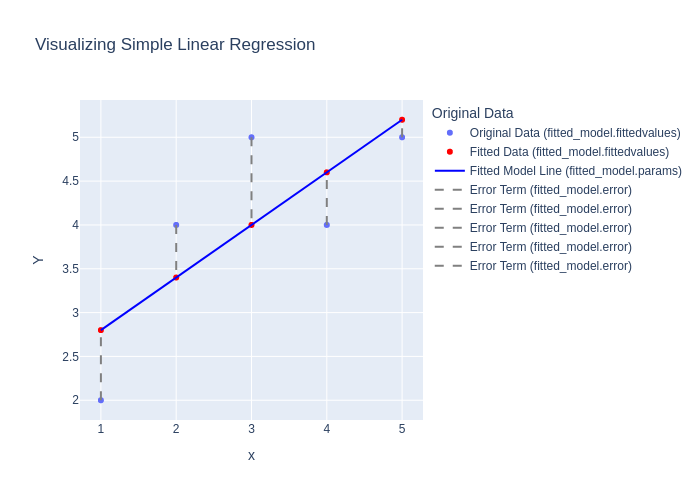

In [6]:
import statsmodels.api as sm
import pandas as pd
import plotly.express as px

# Simulated data (original data)
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'Y': [2, 4, 5, 4, 5]
})

# Add constant term for intercept (OLS requires this to calculate the intercept)
X = sm.add_constant(df['x'])  # Adds a column of ones for the intercept
model = sm.OLS(df['Y'], X).fit()

# The estimated parameters (slope and intercept)
intercept, slope = model.params
print("Intercept:", intercept)
print("Slope:", slope)

# Create the fitted values (predicted values of Y)
fitted_values = model.fittedvalues

# Create a Plotly figure to visualize
df['Fitted Y'] = fitted_values  # Add the fitted values to the dataframe for plotting

# Add constant 'Data' label to the original data for legend grouping
df['Original Data'] = 'Original Data (fitted_model.fittedvalues)'  # Original data points
df['Fitted Values'] = 'Fitted Data (fitted_model.params)'  # Predicted data points
df['Fitted Model Line'] = 'Fitted Model Line (fitted_model.line)'  # Model line

# Create scatter plot for original data points (blue dots)
fig = px.scatter(df, x='x', y='Y', color='Original Data', title='Visualizing Simple Linear Regression')

# Add fitted data points (red dots) to the plot
fig.add_scatter(x=df['x'], y=df['Fitted Y'], mode='markers', name="Fitted Data (fitted_model.fittedvalues)", marker=dict(color='red'))

# Add the fitted model line (blue line)
fig.add_scatter(x=df['x'], y=intercept + slope * df['x'], mode='lines', name="Fitted Model Line (fitted_model.params)", line=dict(color='blue'))

# Add lines representing the error term (difference between original Y and fitted Y)
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]], y=[df['Y'][i], df['Fitted Y'][i]],
                    mode='lines', line=dict(color='gray', dash='dash'), name="Error Term (fitted_model.error)")

# Show the plot with the renderer set to PNG
fig.show(renderer="png")



This visualization shows a comparison between the original data points (blue dots) and the fitted values (red dots) from a simple linear regression model. The fitted model line (blue line) represents the estimated relationship between the predictor variable and outcome based on the calculated slope and intercept from the model’s parameters (fitted_model.params). The error terms (gray dashed lines) illustrate the difference between each original data point and its corresponding fitted value, indicating the model's prediction error for each point. The legend labels—Original Data, Fitted Data (fitted_model.params), Fitted Model Line (fitted_model.line).

The regression line is fitted to the data by finding the line that best represents the relationship between the predictor (X) and the outcome (Y) in the original data points. This is achieved through a method called **Ordinary Least Squares (OLS)**, which aims to minimize the sum of the squared differences—often called **residuals**—between the actual Y values and the predicted Y values on the line. Essentially, OLS finds the slope and intercept that produce a line where the total squared error (the sum of squared vertical distances between each data point and the line) is as small as possible. By minimizing this error, the line balances itself to capture the trend of the data, resulting in a fitted model that provides the best linear approximation to predict Y based on X. This minimization process ensures that the fitted model line is as close as possible to the actual data points, thereby reducing the variance or error in predictions.

**ChatGPT Summary** https://chatgpt.com/share/672bf74c-b8b4-8012-a79b-6d62836a8db5

In our discussion, we focused on visualizing the difference between original data points and the fitted regression model. The blue dots represent the original data, while the blue line is the fitted model line, derived through Ordinary Least Squares (OLS). OLS minimizes the sum of squared residuals, which are the vertical distances between each data point and the regression line, to estimate the best-fitting line. The residuals, shown as red dashed lines, indicate the prediction errors. The fitted line is calculated based on the model's parameters, ensuring it closely approximates the relationship between the predictor (X) and outcome (Y).

## 5. ##

In simple linear regression using the "ordinary least squares" (OLS) method, the fitted line is chosen to minimize the sum of the squared residuals. These residuals represent how far off each prediction is from the actual outcome. By squaring the residuals (rather than summing absolute distances), OLS emphasizes larger errors, ensuring the line fits the central trend of the data as closely as possible. This squaring also allows the method to penalize outliers more, creating a balanced line that minimizes total prediction error across all points.

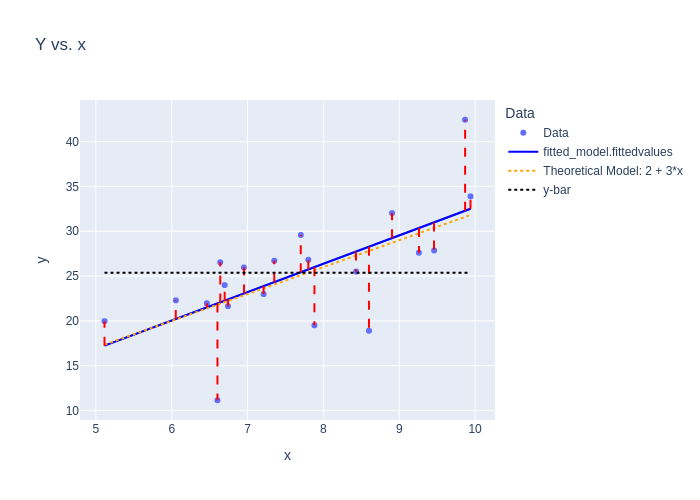

In [6]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Set parameters for data generation
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
y = beta0 + beta1 * x + errors  # Generate dependent variable

# Create DataFrame for regression model
df = pd.DataFrame({'x': x, 'y': y})

# Fit the OLS model
model_data_specification = smf.ols("y ~ x", data=df) 
fitted_model = model_data_specification.fit() 

# Plot the data points and the trendline
df['Data'] = 'Data'  # Label to add data to legend 
fig = px.scatter(df, x='x', y='y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted OLS line using fitted values
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="fitted_model.fittedvalues")

# Calculate theoretical model line over the x-range and add to plot
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f"Theoretical Model: {beta0} + {beta1}*x", 
                line=dict(dash='dot', color='orange'))

# Add vertical dashed red lines for residuals between actual and fitted values
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add a horizontal line for the mean of y
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer="png")  # Adjust for GitHub/MarkUs submission requirements


In the visualization, the red dashed vertical lines show the residuals, highlighting how each data point deviates from the fitted OLS line, while the dotted orange line represents the "true" theoretical model line based on pre-defined parameters. The goal of the OLS method is to place the fitted line where the total squared vertical distances (residuals) from the blue fitted line to the original points is minimized, providing the best linear approximation for predictions based on observed data.

## 6. ##

1. 1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()
2. fitted_model.rsquared
3. np.corrcoef(Y,fitted_model.fittedvalues)[0,1]**2
4. np.corrcoef(Y,x)[0,1]**2

The equation 1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum() calculates R-squared, which measures how well a model explains the variation in the data. Here's the breakdown: The denominator, ((Y - Y.mean())**2).sum(), represents the total variation in Y around its average value, which is what we would see if we didn’t use a model at all. The numerator, ((Y - fitted_model.fittedvalues)**2).sum(), is the residual variation, or the part of Y that our model couldn't explain. By dividing the unexplained variation by the total variation, we get the proportion of variation that is not explained by the model. Subtracting this from 1 gives us the proportion of variation that **is** explained by the model, which is R-squared. So, R-squared can be seen as the fraction of the data's variability that the model accounts for.

As such, fitted_model.rsquared, represents R-squared or the variation that IS explained by our model. So, can be interpreted as the measure of accuracy of our model.

The expression np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 calculates the square of the correlation coefficient between the actual values of Y and the fitted (predicted) values from the model. The correlation coefficient measures the strength and direction of the linear relationship between Y and the fitted values. By squaring the correlation coefficient, we get the R-squared value, which represents the proportion of the variation in Y that is explained by the model. Essentially, this shows how well the predicted values from the model align with the actual values of Y.

Similarly, the expression np.corrcoef(Y, x)[0,1]**2 calculates the square of the correlation coefficient between Y and the predictor variable X. This gives a measure of how strongly Y and X are linearly related, and squaring it gives the proportion of variation in Y that is explained by X alone (in a simple linear regression model). Just like with the model’s predictions, a higher squared correlation indicates a stronger relationship between Y and X, meaning that X explains a larger proportion of the variation in Y.

**ChatGPT Summary** https://chatgpt.com/share/672bf74c-b8b4-8012-a79b-6d62836a8db5

Sure! Here’s a short point form summary of our interaction:

- **R-squared Explanation**:
  - R-squared represents the proportion of variation in \( Y \) explained by the model.
  - Formula: \( R^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}} \).
  - The equation \( 1 - ((Y - \text{fitted values})^2).sum() / ((Y - \text{mean})^2).sum() \) calculates this proportion, where the numerator is unexplained variation (residuals) and the denominator is total variation in \( Y \).
  
- **np.corrcoef(Y, fitted_model.fittedvalues)**:
  - Calculates the correlation between actual values of \( Y \) and the fitted (predicted) values from the model.
  - Squaring this correlation coefficient gives \( R^2 \), the proportion of \( Y \)'s variation explained by the model.

- **np.corrcoef(Y, x)**:
  - Calculates the correlation between \( Y \) and the predictor variable \( X \).
  - Squaring this correlation coefficient gives the proportion of \( Y \)'s variation explained by \( X \) in simple linear regression.

- **Key Idea**: R-squared, whether calculated from fitted values or the correlation with \( X \), measures how much of the variation in \( Y \) is explained by the model or predictor variable.

## 7. ##

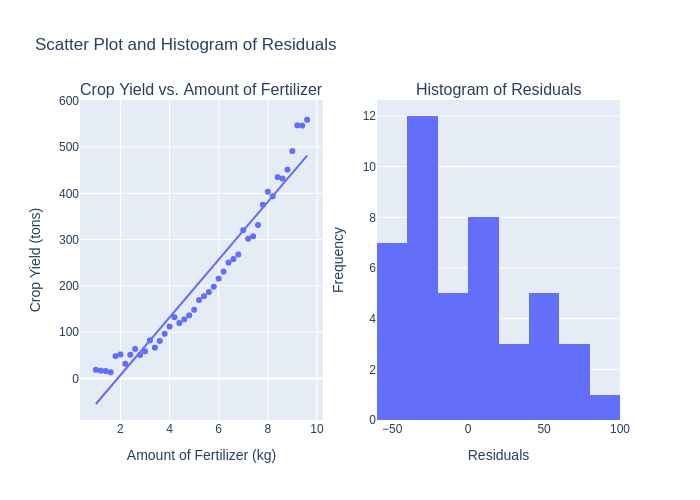

In [7]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

There are two assumptions which may not be compatible by this model:
    
1) **Linear relationship**

2) **Homoscedasticity**

By analyzing the distribution of data points in the scatterplot, it is not entirely clear if there is a linear relationship between the two variables. As fertilizer amounts approach 10kg, we see an upwards spike in Y values. In contrast, when fertilizer amounts stay between 4kg - 8kg, we see Y values consistently below the trendline. Therefore, there may not be a linear relationship between the 2 variables.

Second, for a linear regression to work, residuals must be normally distributed. In other words, the variance of the residuals must stay constant across all levels of the independent variable. Since the residuals fan out and contract at different levels of the predictor variable, it indicates heteroscedasticity, which violates this assumption. Additionally, the histogram of risiduals is skewed and suggest non-normal distribution.

## 8. ##

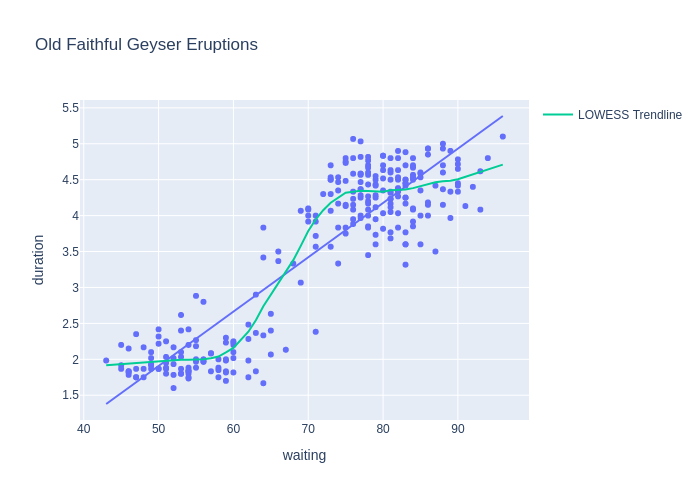

In [6]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [3]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        01:55:34   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Null Hypothesis **H0**: There is no linear relationship between the waiting time and the duration of the Old Faithful geyser eruptions.

- This hypothesis implies that the slope of the regression line is zero (i.e., no relationship).

Analyzing the data suggests a strong evidence AGAINST the null hypothesis. Suggesting that there exists a linear relationship between the two variables. Explanation:

**1)** Coefficient for Waiting

The "waiting" variable has a coefficient of 0.0756, which means that for every 1-minute increase in waiting time, the eruption duration increases by about 0.0756 minutes (around 4.5 seconds). The p-value for this coefficient is also very small (0.000), meaning there's a strong relationship between waiting time and eruption duration.

0.001 >= P (Very strong evidence against Null Hypothesis)

**2)** F-Statistic

The F-statistic tells us how well the whole model (the relationship between waiting time and eruption duration) fits the data. The p-value for the F-statistic is extremely small (0.001 >= P), which is much smaller than any usual threshold (like 0.05). This means the model is very, very likely to be a good fit and not due to random chance. So, the relationship between waiting time and eruption duration is statistically significant.

**3)** R-Squared

This tells us how much of the variation in eruption duration can be explained by the waiting time. Here, 81.1% of the variation is explained, which is pretty strong evidence that waiting time is an important factor in determining how long the eruptions last.

**ChatGPT Summary** https://chatgpt.com/share/672d72a4-4eac-8012-aaab-4794a0a5a0e4

- **Null Hypothesis:** No linear relationship between waiting time and eruption duration.
- **Key Results:**
  - **F-statistic**: 1162, **p-value**: \(8.13 \times 10^{-100}\) (highly significant).
  - **Waiting coefficient**: 0.0756, **t-statistic**: 34.089, **p-value**: 0.000 (significant relationship).
  - **R-squared**: 0.811, meaning waiting time explains 81.1% of eruption duration.
- **Conclusion:** Strong evidence to **reject the null hypothesis** (significant relationship).
- **Alpha value:** Yes, typically use an alpha value like 0.05 to determine significance.

## 9. ##

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


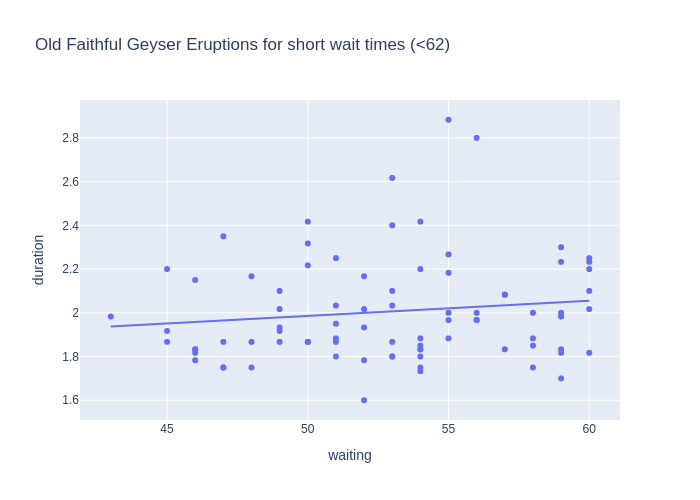

In [5]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Null Hypothesis **H0**: There is no linear relationship between the waiting time and the duration of the Old Faithful geyser eruptions.

- This hypothesis implies that the slope of the regression line is zero (i.e., no relationship).

Similarly to the previous question #8, we will assess the data and gather evidence for the null hypothesis.

- Intercept: 1.6401
- Coefficient for "waiting" (Slope): 0.0069
- Standard error of "waiting" coefficient: 0.006
- t-statistic for "waiting": 1.188
- p-value for "waiting": 0.238

**Coefficient for "waiting"** (0.0069): This coefficient indicates how much the eruption duration is expected to change with each additional minute of waiting time (Slope). In this case, for every additional minute of waiting, the duration of the eruption is expected to increase by only 0.0069 minutes (or roughly 0.4 seconds). This effect size is very small, suggesting that waiting time doesn’t have a strong influence on duration within this subset of shorter waits.

**P-value** (0.238): The p-value helps us test our null hypothesis, which in this case states that there is no relationship between waiting time and eruption duration. For this question, we will compare the P-value to an alpha value of 0.05.

- If the p-value is less than or equal to 0.05, we have enough evidence to reject the null hypothesis.
- If the p-value is greater than 0.05, as it is here (0.238), we fail to reject the null hypothesis, meaning we do not have sufficient evidence to conclude that waiting time affects eruption duration in this subset of the data.

Since our p-value (0.238) is much higher than 0.05, we conclude that, for shorter wait times, there is no statistically significant relationship between waiting time and eruption duration.

**t-statistic** (1.188): The t-statistic is a measure of how far the coefficient is from zero in terms of standard deviations. A low t-value (like 1.188 here) further supports that the coefficient is not statistically different from zero, meaning the effect of waiting time on eruption duration is minimal within this subset.

**Summary**
In summary, when we restrict our data to geyser eruptions that occur after shorter wait times (under 62 minutes, in this example), we do not observe a statistically significant relationship between waiting time and eruption duration. This is evidenced by:

A small coefficient (0.0069) that indicates a minimal effect of waiting time on duration,
A high p-value (0.238), which tells us there isn’t enough evidence to conclude a meaningful relationship.
Thus, we fail to reject the null hypothesis in this context, meaning that for short wait times, changes in waiting time do not have a significant effect on the eruption duration.

**ChatGPT Summary** https://chatgpt.com/share/672d72a4-4eac-8012-aaab-4794a0a5a0e4

In our interaction, you asked me to help analyze whether there’s a significant relationship between waiting time and eruption duration for short wait times in the Old Faithful geyser dataset. We reviewed regression output to interpret key metrics, including the coefficient, p-value, and t-statistic, to determine if there was enough evidence to reject the null hypothesis. The analysis concluded that for short wait times, there is no statistically significant relationship between waiting time and eruption duration.

## 10. ##

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


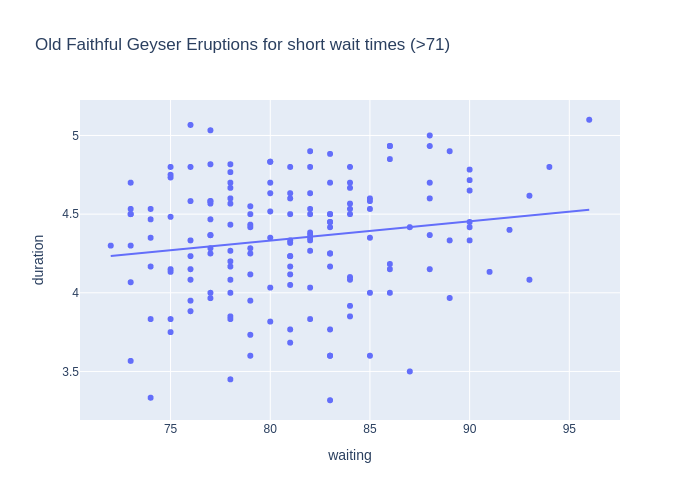

In [11]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1) Generates and visualizes the bootstrapped sampling distribution of the slope coefficients for long wait times.

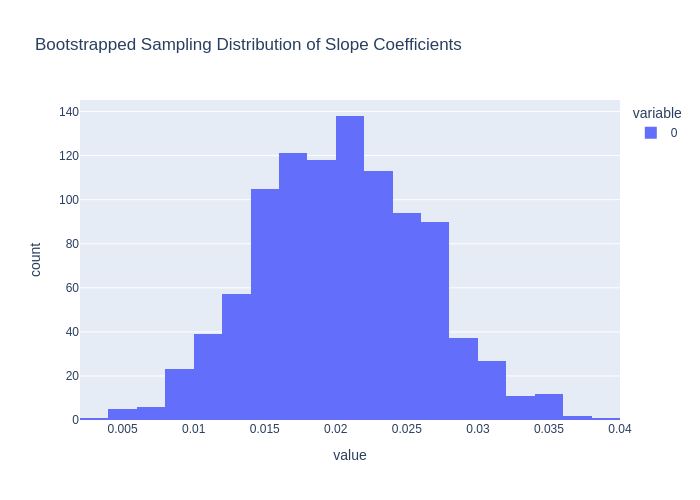

In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.utils import resample

# Define the threshold for long wait times
long_wait_limit = 70  # Adjust as appropriate
long_wait = old_faithful.waiting >= long_wait_limit

# Bootstrapping: generate bootstrap samples and collect slope coefficients
n_bootstraps = 1000
slope_coeffs = []

for _ in range(n_bootstraps):
    # Resample the data with replacement
    bootstrap_sample = resample(old_faithful[long_wait])
    # Fit a linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    slope_coeffs.append(model.params['waiting'])

# Visualize the bootstrapped sampling distribution of slope coefficients
fig = px.histogram(slope_coeffs, nbins=30, title="Bootstrapped Sampling Distribution of Slope Coefficients")
fig.show(renderer="png")


2) Simulates the sampling distribution under a null hypothesis of no association and visualizes it.


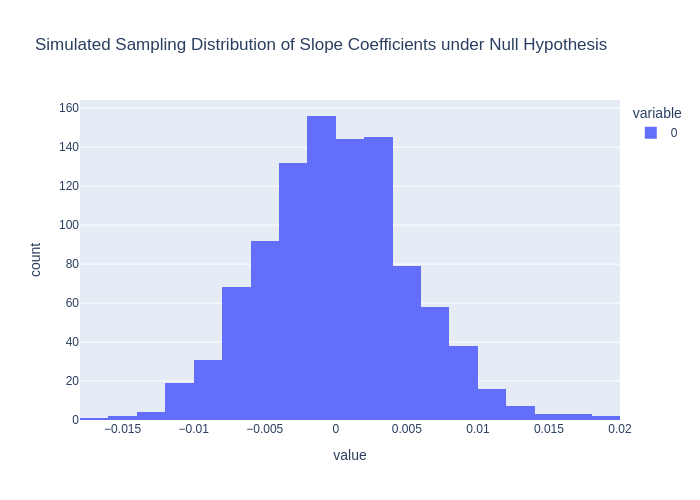

In [15]:
# Parameters for null hypothesis model
B0 = 1.65
B1 = 0
sigma = 0.37
waiting_values = old_faithful[long_wait]['waiting'].values  # X values for long wait times

# Generate simulated sampling distribution of slope coefficients
simulated_slope_coeffs = []

for _ in range(n_bootstraps):
    # Simulate Y values under null hypothesis of no association
    Y_simulated = B0 + B1 * waiting_values + np.random.normal(0, sigma, len(waiting_values))
    simulated_data = pd.DataFrame({'waiting': waiting_values, 'duration': Y_simulated})
    
    # Fit a linear model and collect the slope coefficient
    sim_model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slope_coeffs.append(sim_model.params['waiting'])

# Visualize the sampling distribution of slope coefficients under null hypothesis
fig = px.histogram(simulated_slope_coeffs, nbins=30, title="Simulated Sampling Distribution of Slope Coefficients under Null Hypothesis")
fig.show(renderer="png")


3) Calculates whether 0 is within the 95% confidence interval for the bootstrapped distribution, and compares the observed p-value to the simulated p-value from the null hypothesis.


In [16]:
# Calculate 95% confidence interval for bootstrapped slope coefficients
conf_interval = np.percentile(slope_coeffs, [2.5, 97.5])
contains_zero = conf_interval[0] <= 0 <= conf_interval[1]

# Print whether the confidence interval contains zero
print("95% Confidence Interval for Bootstrapped Slope Coefficients:", conf_interval)
print("Does the 95% Confidence Interval contain 0?", contains_zero)

# Compare p-value from simulated null distribution to the observed model p-value
observed_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
observed_p_value = observed_model.pvalues['waiting']

# Calculate simulated p-value by finding proportion of simulated slopes close to zero
simulated_p_value = (np.abs(simulated_slope_coeffs) >= np.abs(observed_model.params['waiting'])).mean()

print("Observed p-value from OLS model:", observed_p_value)
print("Simulated p-value from null hypothesis distribution:", simulated_p_value)

95% Confidence Interval for Bootstrapped Slope Coefficients: [0.00810053 0.03137066]
Does the 95% Confidence Interval contain 0? False
Observed p-value from OLS model: 0.00032000147613835285
Simulated p-value from null hypothesis distribution: 0.0


**ChatGPT Summary** https://chatgpt.com/share/672d72a4-4eac-8012-aaab-4794a0a5a0e4

In our interaction, you asked for assistance with analyzing the relationship between wait time and eruption duration in the Old Faithful geyser dataset, focusing specifically on long wait times (greater than 60 minutes). The goal was to assess whether there’s evidence for a linear association in this subset of data using bootstrapping and simulation techniques. 

Here’s what we covered:

1. **Bootstrapping Slope Coefficients**: We generated 1,000 bootstrap samples of the long wait times data, fitted a Simple Linear Regression model to each, and visualized the bootstrapped sampling distribution of the slope coefficients.

2. **Simulated Slope Coefficients Under Null Hypothesis**: We simulated a null hypothesis scenario (no linear association) by creating a dataset with specified parameters \( B_0 = 1.65 \), \( B_1 = 0 \), and \( \sigma = 0.37 \). We fitted a regression model to these simulated samples, collected the slope coefficients, and visualized their distribution.

3. **95% Confidence Interval and Simulated p-value**: We calculated a 95% confidence interval for the bootstrapped slope coefficients to see if it included zero, indicating no significant association. We also computed a simulated p-value to assess whether the observed slope coefficient was statistically significant under the null hypothesis.

The analysis aimed to determine if there is a statistically significant linear association between waiting time and eruption duration for long wait times, based on the confidence interval and p-value results.

## 11. ##

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


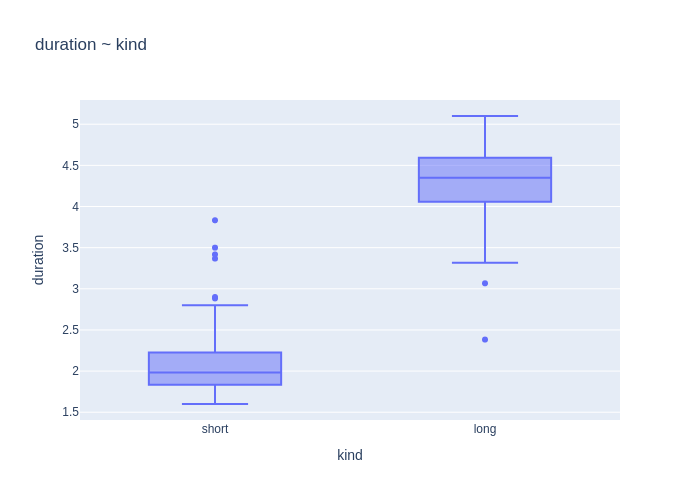

In [22]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**Model 1**: smf.ols('duration ~ waiting', data=old_faithful)

Description: This model assumes that there is a single linear relationship between the waiting variable (time between eruptions) and duration (duration of the eruption). The relationship is continuous and does not account for any grouping or differences between short and long wait times.

- This approach suggests that for every minute of waiting time, there is a consistent change in eruption duration, but without considering potential distinct groupings based on short or long waiting times.

**Model 2**: smf.ols('duration ~ waiting', data=old_faithful[short_wait])

Description: This model uses only short wait times (those less than the specified threshold) to fit the regression. It assumes that the linear relationship holds just for short wait times.

- It provides insights into how eruption duration relates to waiting times when those waiting times are relatively short.

**Model 3**: smf.ols('duration ~ waiting', data=old_faithful[long_wait])

Description: Similarly, this model looks only at long wait times, assuming the relationship between waiting and duration holds for that subset of data.

- This model focuses on how eruption duration is influenced by waiting times when the wait is long, possibly indicating a different dynamic than for short wait times.

## Analysis ## 

The coefficient for the comparison between the "long" wait times and the reference "short" group is 2.2036. This means that the average eruption duration for long wait times is 2.2036 minutes longer than the average eruption duration for short wait times, assuming all other factors remain constant.

The standard error of 0.052 is again small, meaning the estimate for the difference between short and long wait times is precise.

The t-statistic of 42.464 is extremely large, which suggests a very strong relationship between the kind variable (short vs. long) and the eruption duration.

The p-value of 0.000 is extremely small, which means the difference between the two groups (short vs. long) is statistically significant.

## Null Hypothesis Test ##

Null Hypothesis H0: The mean eruption duration for long wait times is equal to the mean eruption duration for short wait times (i.e., the coefficient for kind[T.long] = 0).

To assess whether we reject the null hypothesis, we focus on the p-value for the coefficient C(kind, Treatment(reference="short"))[T.long]:

The p-value for the coefficient C(kind, Treatment(reference="short"))[T.long] is 0.000, P < 0.05.

Since p-value < 0.05, we reject the null hypothesis. This means there is strong evidence that the average eruption duration for long wait times is significantly different from that of short wait times.

## Confidence Interval ##

The 95% confidence interval for the coefficient of C(kind, Treatment(reference="short"))[T.long], which is [2.101, 2.306]. This interval does not include 0. Therefore, we are 95% confident there is a significant difference between the two groups. 

**ChatGPT Summary** https://chatgpt.com/share/672d72a4-4eac-8012-aaab-4794a0a5a0e4

- You asked for help analyzing the evidence against the null hypothesis of "no difference between groups" (short vs. long wait times) using a regression model with an indicator variable for wait time.
- The regression output provided the coefficient for the "long" group (relative to the "short" group) as **2.2036**, with a p-value of **0.000**, indicating a significant difference in eruption duration between the two groups.
- We discussed that, based on the p-value being less than 0.05, the null hypothesis can be rejected, suggesting there is a statistically significant difference between the short and long wait times.
- Additionally, the **95% confidence interval** for the coefficient ([2.101, 2.306]) does not contain 0, further supporting the conclusion of a difference in eruption durations between the two groups.